In [ ]:
# импортируем необходимые библиотеки
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy
from scipy.stats import pearsonr
from scipy import stats
from seaborn import regplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
# импортируем данные
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Bitcoin Historical Data - Investing.com India.csv')

In [ ]:
# Проверяем корректность типов данных
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [ ]:
# Так как данные определились не совсем корректно. Изменяем все данные колонок в один тип данных.

filename = '/content/drive/MyDrive/Bitcoin Historical Data - Investing.com India.csv'
usecols = ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
df = pd.read_csv(filepath_or_buffer=filename, usecols=usecols, thousands=',')
column = 'Change %'
df[column] = df[column].str.rstrip('%').astype('float') / 100.0
column = 'Vol.'
df[column] = df[column].apply(lambda x: float(x[:-1]) * {'K': 1e3, 'M': 1e6, 'B': 1e9}[x[-1]])

df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
dtype: object

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,Jun 23,26931.0,27216.4,27410.2,24838.0,1060000.0,-0.0105
1,May 23,27216.1,29252.1,29816.4,25853.1,1660000.0,-0.0696
2,Apr 23,29252.1,28473.7,30964.9,27054.3,2030000.0,0.0273
3,Mar 23,28473.7,23130.6,29160.4,19591.8,10260000.0,0.2310
4,Feb 23,23130.5,23124.7,25236.8,21418.7,9090000.0,0.0002


In [ ]:
# Данный датасет предоставляет общую информацию о поведении биткоина по периодам, стоимости и объемом продаж, так же есть столбец с %-ным показателем изменения цены от предыдущей даты.

In [ ]:
# Исходя из данных датасета мы можем рассмотреть следующие вопросы:
# 1. Есть ли связь между ценовыми данными и количеством продаж?
# 2. Зависит ли цена биткоина от продолжительности его существования?

In [ ]:
# Рассмотрим гипотезу №1.
# 1. Существует связь между ценой и количеством продаж.

<ipython-input-88-135af242e6cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = df.corr();


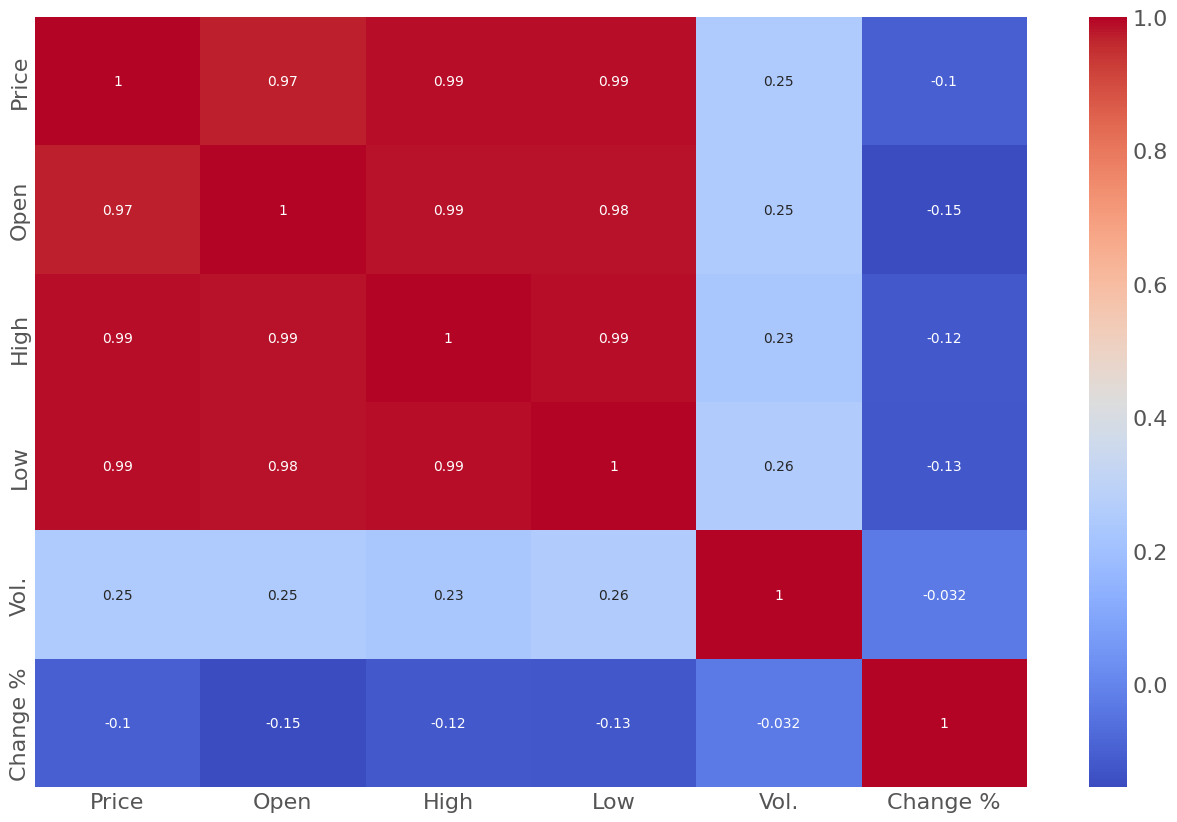

In [ ]:
# потстроим матрицу корреляций
matrix_corr = df.corr();

# вывод корреляционной матрицы
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm');

In [ ]:
matrix_corr

,Price,Open,High,Low,Vol.,Change %
Price,1.000000,0.970269,0.990850,0.990905,0.247215,-0.101363
Open,0.970269,1.000000,0.985079,0.983585,0.251358,-0.154073
High,0.990850,0.985079,1.000000,0.987618,0.231160,-0.121193
Low,0.990905,0.983585,0.987618,1.000000,0.255354,-0.126974
Vol.,0.247215,0.251358,0.231160,0.255354,1.000000,-0.031683
Change %,-0.101363,-0.154073,-0.121193,-0.126974,-0.031683,1.000000


In [ ]:
# вычисляем коэффициент корреляции Пирсона между ценой и объемом продаж.
corr0 = df['Vol.'].corr(df['Price']);
print(f'Корреляция между ценой и объемом продаж {corr0:.3f}')

Корреляция между ценой и объемом продаж 0.247


<Axes: xlabel='Vol.', ylabel='Price'>

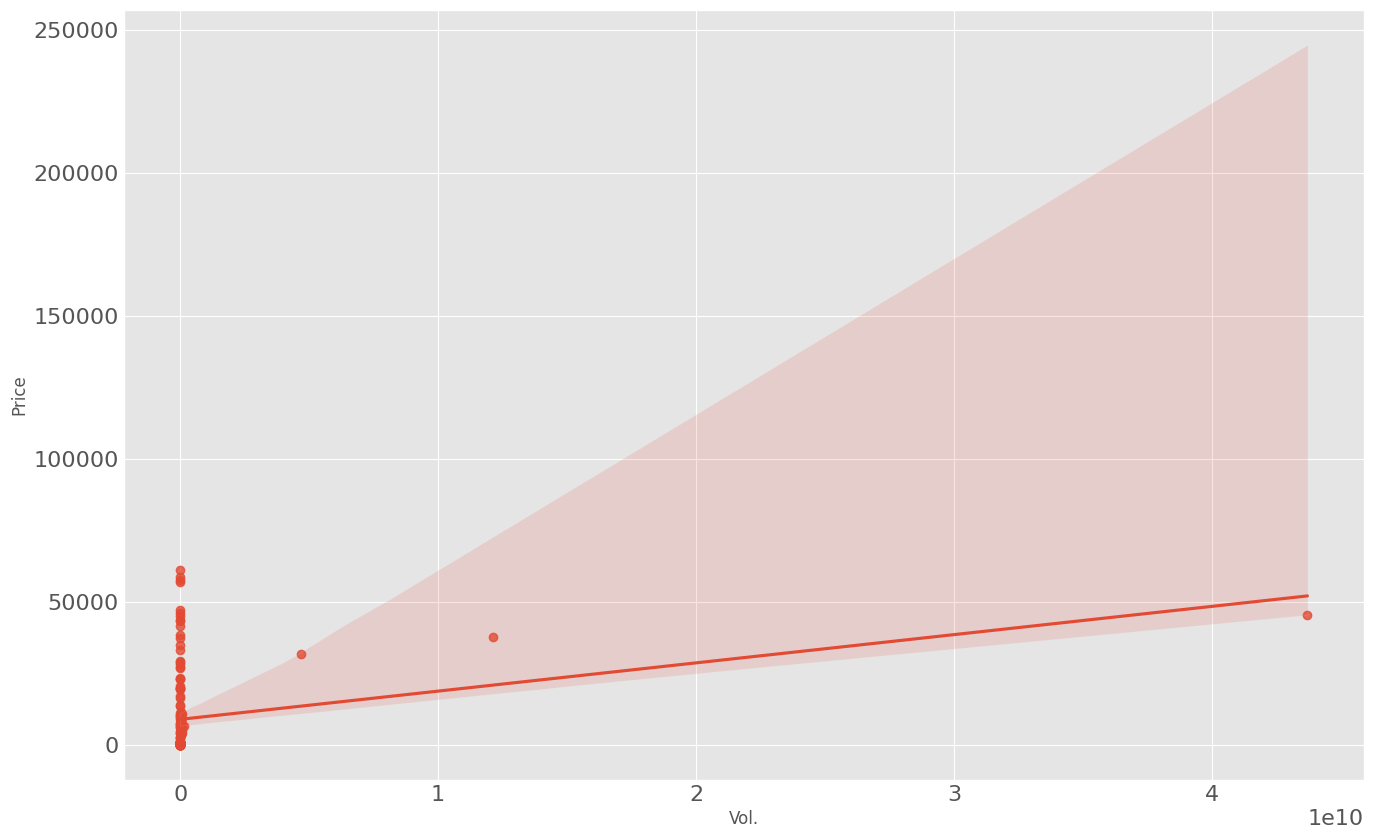

In [ ]:
# строим график зависимости между ценой и объемом продаж
sns.regplot(x='Vol.', y='Price', data=df)

<Axes: xlabel='Vol.', ylabel='Price'>

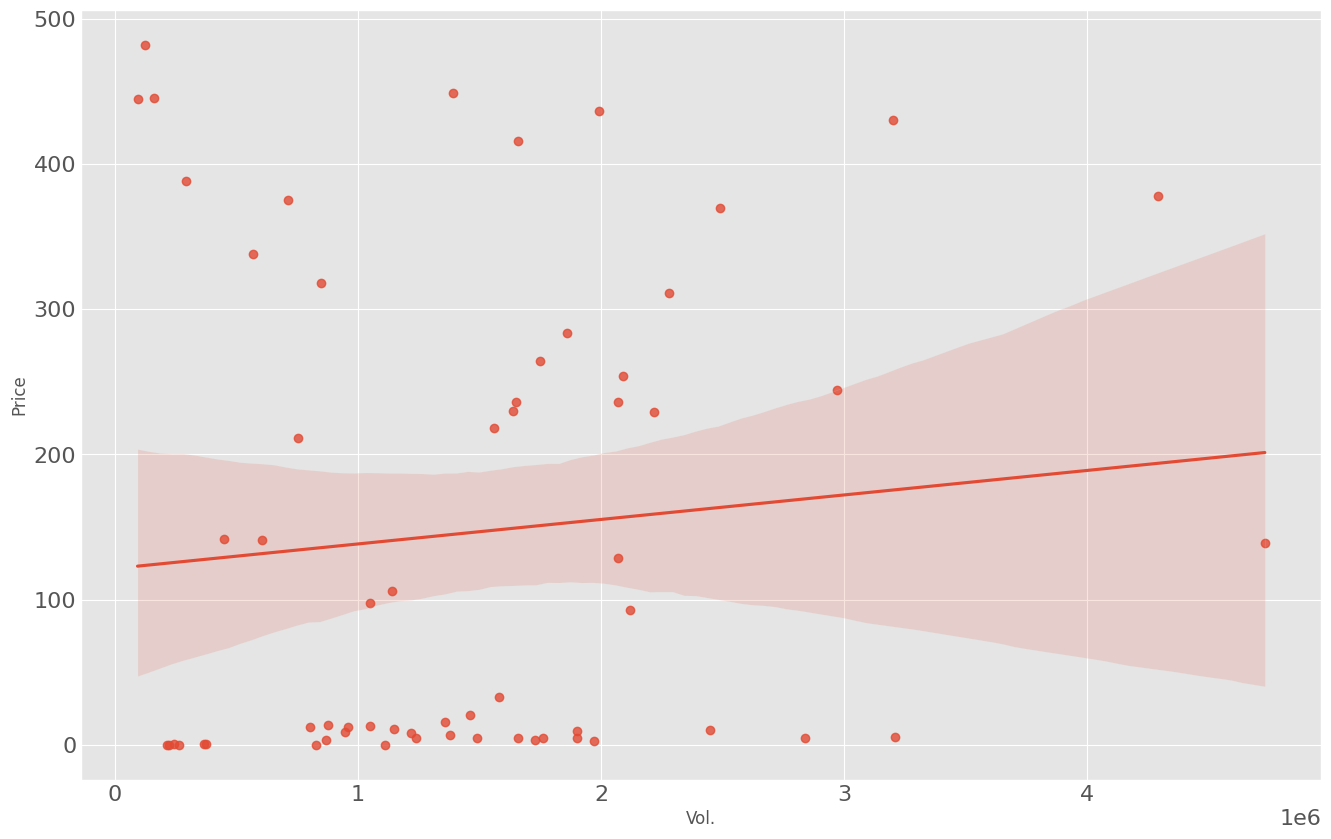

In [ ]:
#Сужаем диапазон цен для наилучшей наглядности результата
df_filtered = df.loc[df['Price'] <= 500]
sns.regplot(x='Vol.', y='Price', data=df_filtered)

In [ ]:
# коэффициент корреляции Пирсона составляет 0.247, что позволяет сделать вывод об отсутствие линейной связи между переменными (цена и количество продаж)
# гипотеза не подтверждена, причино-следственной связи между этими данными не наблюдается